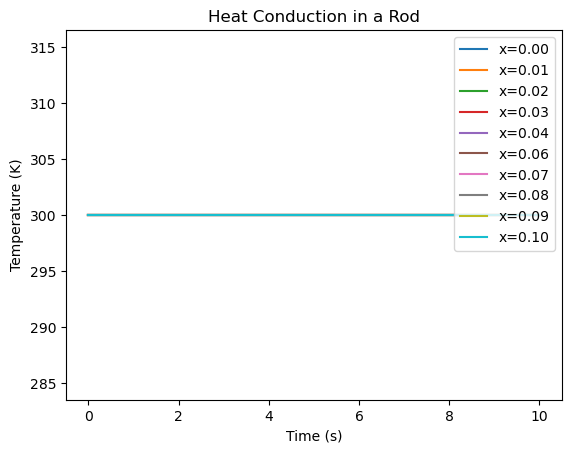

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def heat_conduction(t, T, k, rho_cp, dx):
    dTdt = np.zeros_like(T)
    dTdt[1:-1] = k * (T[2:] - 2 * T[1:-1] + T[:-2]) / dx**2
    return dTdt / rho_cp

def solve_heat_conduction(length, num_points, k, rho_cp, initial_temp, boundary_temp, simulation_time):
    x = np.linspace(0, length, num_points)
    T_initial = np.full(num_points, initial_temp)
    
    result = solve_ivp(
        heat_conduction,
        [0, simulation_time],
        T_initial,
        args=(k, rho_cp, x[1] - x[0]),
        method='RK45',
        t_eval=np.linspace(0, simulation_time, 100)
    )
    
    plt.plot(result.t, result.y.T)
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (K)')
    plt.title('Heat Conduction in a Rod')
    plt.legend([f'x={x_val:.2f}' for x_val in np.linspace(0, length, num_points)])
    plt.show()

# Example usage
rod_length = 0.1  # meters
num_points = 10
thermal_conductivity = 10.0  # W/(m*K)
density_specific_heat = 1000.0  # J/(kg*K)
initial_temperature = 300.0  # K
boundary_temperature = 500.0  # K
simulation_time = 10.0  # seconds

solve_heat_conduction(
    rod_length,
    num_points,
    thermal_conductivity,
    density_specific_heat,
    initial_temperature,
    boundary_temperature,
    simulation_time
)